In [5]:
import numpy as np
import scipy as sp
import scipy.stats as spst
import matplotlib.pyplot as plt
import itertools
import math
import sys

# 1. Conjugate priors


## 1.1 Discrete sampling distributions

### Binomial sampling distribution, beta prior

In [6]:
def beta_plot(alpha, beta):
    x = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(1, 1)
    ax.plot(x, spst.beta.pdf(x, alpha, beta),
           'b-', lw=5, alpha=0.6, label='beta pdf')

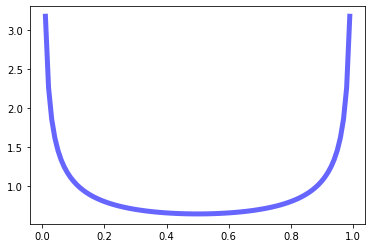

In [7]:
# Jeffery distribution
beta_plot(1/2, 1/2)

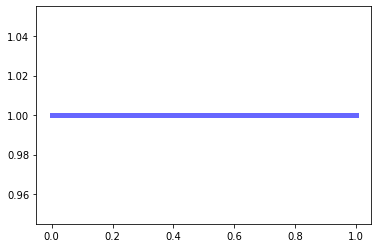

In [8]:
# uniform distribution
beta_plot(1, 1)

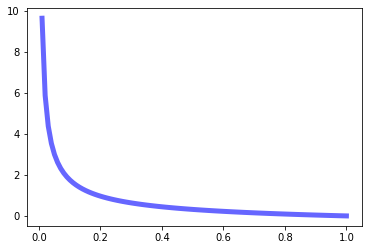

In [9]:
beta_plot(0.3, 2)

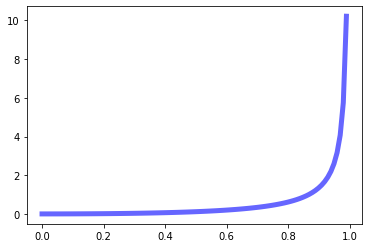

In [10]:
beta_plot(3, 0.2)

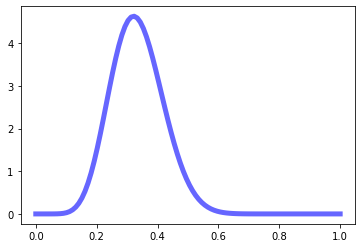

In [12]:
beta_plot(10,20)

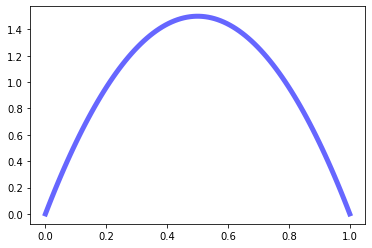

In [13]:
beta_plot(2, 2)

### Likelihood function

In [57]:
def loglike(param, distrib, x):
    rv = distrib(*param)
    try:
        return np.sum(np.log(rv.pdf(x)))
    except AttributeError:
        return np.sum(np.log(rv.pmf(x)))

### Predictive distribution

the prior distribution influencing the inference on θ 

$X \sim B(n, \theta)$

$\pi_{\theta}(t|\alpha, \beta) = beta(t;\alpha, \beta)$

/Users/yunfei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


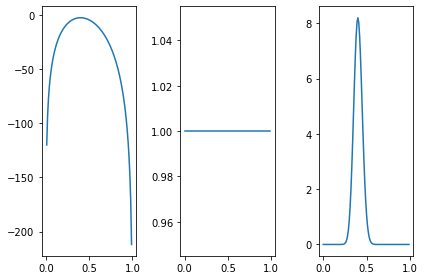

In [58]:
def beta_binomial_L_Pr_Po(alph, beta, x, n):
    t = np.arange(0, 1, 0.01)
    likelihood = [loglike((100, i), spst.binom, x) for i in t]
    prior_function = spst.beta.pdf(t, alph, beta)
    post_function = spst.beta.pdf(t, x + alph, n - x + beta)

    fig, axs = plt.subplots(1, 3, sharex=True, tight_layout=True)
    axs[0].plot(t, likelihood)
    axs[1].plot(t, prior_function)
    axs[2].plot(t, post_function)
    
beta_binomial_L_Pr_Po(alph = 1, beta = 1, x = 40, n = 100)

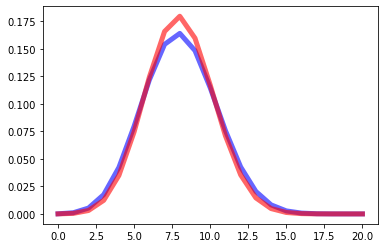

In [41]:
def beta_plot(x, n, n0, alpha, beta):
    x0 = np.linspace(0, n0, n0 + 1)
    predictive = (sp.special.comb(n0, x0) * 
              sp.special.beta(alpha + x + x0, beta + n - x + n0 - x0)/
              sp.special.beta(alpha + x, beta + n - x)) 
    fig, ax = plt.subplots(1, 1)
    ax.plot(x0, predictive,
           'b-', lw=5, alpha=0.6, label='predictive')

    
beta_plot(x = 40, n = 100, n0 = 20, alpha = 1/2, beta = 1/2)
x = np.linspace(0, 20, 20 + 1)
plt.plot(x, spst.binom.pmf(x, 20, 0.4), 'r-', lw=5, alpha=0.6, label='binomial')



### Poisson sampling distribution

### Gamma distribution
${\displaystyle (k-1)\theta {\text{ for }}k\geq 1}$

${\displaystyle {\frac {\alpha -1}{\beta }}{\text{ for }}\alpha \geq 1}$

$\alpha = k$

$\theta = \frac{1}{\beta}$

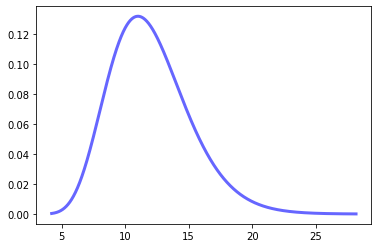

In [64]:
alpha, beta, size = 10, 2, 10000
x = np.linspace(spst.gamma.ppf(0.0001, alpha, beta),
                spst.gamma.ppf(0.9999, alpha, beta), size)
plt.plot(x, spst.gamma.pdf(x, alpha, beta),
       'b-', lw=3, alpha=0.6, label='gamma pdf')

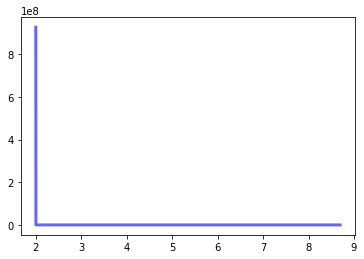

In [55]:
alpha, beta, size = 0.3, 2, 10000
x = np.linspace(spst.gamma.ppf(0.0001, alpha, beta),
                spst.gamma.ppf(0.9999, alpha, beta), size)
plt.plot(x, spst.gamma.pdf(x, alpha, beta),
       'b-', lw=3, alpha=0.6, label='gamma pdf')

$X \sim P(\theta)$

$\pi_{\theta}(t|\alpha, \beta) = gamma(t;\alpha, \beta)$

In [ ]:
def gamma_poisson_L_Pr_Po(alph, beta, X):
    n = len(X)
    t = np.arange(0, 1, 0.01)
    likelihood = [loglike((100, i), spst.binom, x) for i in t]
    prior_function = spst.beta.pdf(t, alph, beta)
    post_function = spst.beta.pdf(t, x + alph, n - x + beta)

    fig, axs = plt.subplots(1, 3, sharex=True, tight_layout=True)
    axs[0].plot(t, likelihood)
    axs[1].plot(t, prior_function)
    axs[2].plot(t, post_function)
    
gamma_poisson_L_Pr_Po(alph = 2, beta = 1, x = 40, n = 100)